# Recognizing Questions Entailment & the type prediction Project

## Import Libiraries

Overleaf link: https://www.overleaf.com/project/62a907c7c720f7abb408c1f1

In [1]:
! pip install -q Distance
! pip install -q scikit-optimize

In [2]:
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
import nltk, re, spacy, scipy
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mannwhitneyu,wilcoxon,ttest_rel,chi2_contingency
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
! pip install -q joblib
import joblib
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
import numpy as np
! pip install -q nltk
import nltk
nltk.download('punkt')
nltk.download('all')

from nltk.tokenize import word_tokenize 
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import r2_score

from keras.regularizers import l2
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model

from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.layers import Input, Dense, Flatten, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract, Add, Conv2D
import tensorflow as tf
import keras
import keras.backend as K
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Input, Concatenate, Conv2D, Flatten, Dense, Embedding, LSTM
from keras.models import Model
from nltk.internals import find_jars_within_path
from nltk.tag import StanfordPOSTagger
from nltk.tag import StanfordNERTagger
from sklearn import linear_model
from sklearn.metrics import fbeta_score, accuracy_score

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from skopt import BayesSearchCV

import tensorflow as tf
import keras
import keras.backend as K
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from keras.models import Model

from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.layers import Input, Dense, Flatten, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract, Add, Conv2D

from keras import backend as K
from sklearn.metrics import roc_auc_score
from tensorflow.keras import regularizers
import os
from lxml import objectify
import pandas as pd
import csv
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pprint import pprint
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import distance
!pip install --upgrade
!pip install strsimpy 
import strsimpy
from strsimpy.levenshtein import Levenshtein
from strsimpy.normalized_levenshtein import NormalizedLevenshtein
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from strsimpy.jaro_winkler import JaroWinkler
from sklearn.metrics import mean_squared_error
import seaborn as sns


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_pe

ERROR: You must give at least one requirement to install (see "pip help install")
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read Data and Select Features
link for first dataset: https://drive.google.com/file/d/15reIx7kjvGRBCmmFmXqpIKCXcAqrW5nL/view?usp=sharing

link for second dataset: https://drive.google.com/file/d/1jGbmNNwiMzK16V_x30G7HHqe2QBOU25u/view?usp=sharing

Download first data from the first link then enter the bath in df1.

Download secind data from second link and enter the bath in df2.

Then run the whole code.

### **For the first data**
### Data that will be used to predict the type of question.

In [145]:
#import train data
df1 = pd.read_csv("/content/drive/MyDrive/med_withCoarse.csv")

In [146]:
#drop useless features
df_1=df1.drop(columns=['Answer','Qtype-Coarse','Focus'])

In [6]:
df_1

,Qtype-Fine,Question
0,information,What is (are) Aphasia ?
1,treatment,What are the treatments for Aphasia ?
2,outlook,What is the outlook for Aphasia ?
3,research,what research (or clinical trials) is being do...
4,information,What is (are) Autism ?
...,...,...
46851,symptoms,What are the symptoms of Atrial myxoma ?
46852,exams and tests,How to diagnose Atrial myxoma ?
46853,treatment,What are the treatments for Atrial myxoma ?
46854,outlook,What is the outlook for Atrial myxoma ?


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46856 entries, 0 to 46855
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Qtype-Fine  46856 non-null  object
 1   Question    46856 non-null  object
dtypes: object(2)
memory usage: 732.2+ KB


In [8]:
df_1.describe()

,Qtype-Fine,Question
count,46856,46856
unique,39,44603
top,information,What is (are) High Blood Cholesterol ?
freq,9005,19


In [147]:
df_1.duplicated().sum()

2253

### **For the second data**
### Data that will be used to measure rank of entailment between two question.

In [9]:
df2=pd.read_csv('/content/drive/MyDrive/pair_questions.csv')

In [10]:
df_2=df2.drop(columns=['ID'])

In [11]:
df_2.head()

,Question_1,normal_Ques,scientific_Ques,Judge_score
0,What is (are) Polycystic ovary syndrome ? (Als...,What are the references with noonan syndrome a...,What is the relationship between Noonan syndro...,1-Incorrect
1,What causes Polycystic ovary syndrome ? (Also ...,What are the references with noonan syndrome a...,What is the relationship between Noonan syndro...,1-Incorrect
2,What causes Noonan syndrome ?,What are the references with noonan syndrome a...,What is the relationship between Noonan syndro...,2-Related
3,What are the complications of Noonan syndrome ?,What are the references with noonan syndrome a...,What is the relationship between Noonan syndro...,2-Related
4,How to prevent Noonan syndrome ?,What are the references with noonan syndrome a...,What is the relationship between Noonan syndro...,2-Related


In [12]:
df_2.describe()

,Question_1,normal_Ques,scientific_Ques,Judge_score
count,2479,2479,2479,2479
unique,1805,103,103,4
top,What is (are) Shingles ?,My question to you is: what is the reason that...,What is the reason that there is so little res...,1-Incorrect
freq,15,45,45,1436


In [13]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Question_1       2479 non-null   object
 1   normal_Ques      2479 non-null   object
 2   scientific_Ques  2479 non-null   object
 3   Judge_score      2479 non-null   object
dtypes: object(4)
memory usage: 77.6+ KB


In [14]:
df_2['normal_Ques'][0]

'What are the references with noonan syndrome and polycystic renal disease'

## Data Preprocessing

In [15]:
def preprocess(corpus, ques_words, cleaning = True, lemmatization = True, remove = True):

    cleaned_corpus = pd.DataFrame()
    for row in corpus:
        dataa = []
        for word in row.split():
          # remove punctuation
            x1 = re.sub(pattern='[^a-zA-Z_]',repl=' ',string=word)
            # convert words to lowecase
            x2 = x1.lower()
            dataa.append(x2)
        cleaned_corpus = cleaned_corpus.append(pd.Series(' '.join(dataa)), ignore_index=True)
    corpus=cleaned_corpus
    corpus.columns = ["entail"]
    #remove stopwords
    if remove == True:
        stop = set(stopwords.words('english'))
        for word in ques_words:
            stop.remove(word)
        corpus = [[x for x in x.split() if x not in stop] for x in corpus["entail"]]
    else :
        corpus = [[x for x in x.split()] for x in corpus]
        # apply lemmatizing to convert to base words
    if lemmatization == True:
        lem = WordNetLemmatizer()
        corpus = [[lem.lemmatize(x, pos = 'v') for x in x] for x in corpus]
    corpus = [' '.join(x) for x in corpus]
    return corpus

### First Data cleaninig and preprocessing

In [16]:
#for the first data
df_1 = df_1.convert_dtypes()
ques = pd.Series(df_1['Question'].tolist()).astype(str)

In [17]:
# prprocess first data
ques_wor = ['who', 'what', 'when', 'why', 'how', 'which', 'where', 'whom']
df_1['Question'] = preprocess(ques, ques_wor)

In [18]:
df_1

,Qtype-Fine,Question
0,information,what aphasia
1,treatment,what treatments aphasia
2,outlook,what outlook aphasia
3,research,what research clinical trials do aphasia
4,information,what autism
...,...,...
46851,symptoms,what symptoms atrial myxoma
46852,exams and tests,how diagnose atrial myxoma
46853,treatment,what treatments atrial myxoma
46854,outlook,what outlook atrial myxoma


In [19]:
#convert to string type
typ_train = pd.Series(df_1['Qtype-Fine'].tolist()).astype(str)

In [20]:
#remove some special char. from Qtype
typ_train=typ_train.str.translate(str.maketrans({',':' '}))
typ_train=typ_train.str.translate(str.maketrans({'_':' '}))

In [21]:
# preprocess Qtype
ques_wor_=[]
df_1['Qtype-Fine']=preprocess(typ_train, ques_wor_)

In [22]:
df_1

,Qtype-Fine,Question
0,information,what aphasia
1,treatment,what treatments aphasia
2,outlook,what outlook aphasia
3,research,what research clinical trials do aphasia
4,information,what autism
...,...,...
46851,symptoms,what symptoms atrial myxoma
46852,exams test,how diagnose atrial myxoma
46853,treatment,what treatments atrial myxoma
46854,outlook,what outlook atrial myxoma


### Second data cleaning and preprocessing

In [23]:
#for second data
df_2= df_2.convert_dtypes()
ques_1 = pd.Series(df_2['Question_1'].tolist()).astype(str)
ques2 = pd.Series(df_2['normal_Ques'].tolist()).astype(str)
ques3 = pd.Series(df_2['scientific_Ques'].tolist()).astype(str)

In [24]:
#preprocess second data
ques_wor =['who', 'what', 'when', 'why', 'how', 'which', 'where', 'whom']
df_2['Question_1']=preprocess(ques_1, ques_wor)
df_2['normal_Ques']=preprocess(ques2, ques_wor)
df_2['scientific_Ques']=preprocess(ques3, ques_wor)

In [25]:
df_2

,Question_1,normal_Ques,scientific_Ques,Judge_score
0,what polycystic ovary syndrome also call polyc...,what reference noonan syndrome polycystic rena...,what relationship noonan syndrome polycystic r...,1-Incorrect
1,what cause polycystic ovary syndrome also call...,what reference noonan syndrome polycystic rena...,what relationship noonan syndrome polycystic r...,1-Incorrect
2,what cause noonan syndrome,what reference noonan syndrome polycystic rena...,what relationship noonan syndrome polycystic r...,2-Related
3,what complications noonan syndrome,what reference noonan syndrome polycystic rena...,what relationship noonan syndrome polycystic r...,2-Related
4,how prevent noonan syndrome,what reference noonan syndrome polycystic rena...,what relationship noonan syndrome polycystic r...,2-Related
...,...,...,...,...
2474,what forget dose glimepiride,please provide glimepiride storage allowable t...,define temperature exposure expiration data re...,2-Related
2475,what side effect risk glimepiride,please provide glimepiride storage allowable t...,define temperature exposure expiration data re...,2-Related
2476,what case emergency overdose glimepiride,please provide glimepiride storage allowable t...,define temperature exposure expiration data re...,2-Related
2477,what information know glimepiride,please provide glimepiride storage allowable t...,define temperature exposure expiration data re...,2-Related


## Data Exploration

### For the first data, Is the ratio of treatment questions in the dataset significantly different from this ratio in the test dataset?

In [26]:
#check duplicates
df_1.duplicated().sum()

4119

In [27]:
# remove duplicates 
df_1=df_1.drop_duplicates()

In [28]:
# split data into train and test
datatrain,datatest=train_test_split(df_1,test_size=0.3)

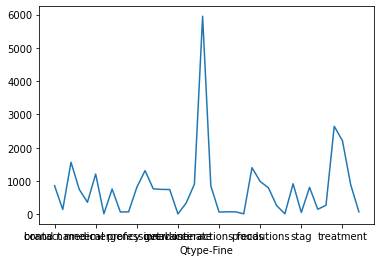

In [29]:
# visualize no. of questions in each type of train data
%matplotlib inline
GroupedData=datatrain.groupby(by='Qtype-Fine').size()
GroupedData.plot.line()

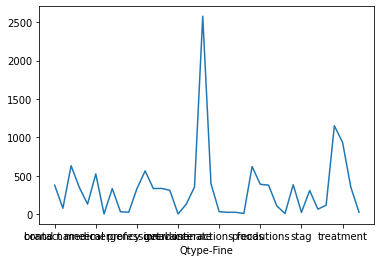

In [30]:
# visualize no. of questions in each type of test data
%matplotlib inline
GroupedData=datatest.groupby(by='Qtype-Fine').size()
GroupedData.plot.line()

In [31]:
from scipy import stats
datatrain=datatrain[['Qtype-Fine','Question']]
datatest=datatest[['Qtype-Fine','Question']]
train=datatrain[datatrain['Qtype-Fine']=='treatment']
test=datatest[datatest['Qtype-Fine']=='treatment']

In [32]:
national_table = pd.crosstab(index=train['Qtype-Fine'], columns="count")
minnesota_table = pd.crosstab(index=test['Qtype-Fine'], columns="count")
observed = minnesota_table
national_ratios = national_table/len(datatrain)  # Get population ratios
expected = national_ratios * len(datatest)   # Get expected counts
chi_squared_stat = (((observed-expected)**2)/expected).sum()
print(chi_squared_stat)

col_0
count    0.133323
dtype: float64


In [33]:
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat ,df=38) # Find the p-value
print("P value equal ",p_value)
alpha = 0.05
if p_value > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

P value equal  [1.]
Same distribution (fail to reject H0)


The p-value is not less than 0.05 hence, we failed to reject the null hypothesis at a 95% level of confidence. And the two datasets have
equal median.

### For second data exploration

In [34]:
# check no. of duplicate rows in dataset2 
df_2.duplicated().sum()

234

In [35]:
# drop duplicates
df_2=df_2.drop_duplicates()

In [36]:
# reset index of dataframe
df_2=df_2.reset_index()
df_2=df_2.drop(columns=['index'])

#### Check if the any two questions have different ranks.

In [37]:
# check if any duplicate in two questions columns only
df_2.duplicated(subset=['Question_1','normal_Ques']).sum()

162

In [38]:
# visualize duplicate questions
da=df_2[df_2.duplicated(subset=['Question_1','normal_Ques'])]
da

,Question_1,normal_Ques,scientific_Ques,Judge_score
11,what cause noonan syndrome,what reference noonan syndrome polycystic rena...,what relationship noonan syndrome polycystic r...,3-Incomplete
14,noonan syndrome inherit also call male turner ...,what reference noonan syndrome polycystic rena...,what relationship noonan syndrome polycystic r...,3-Incomplete
127,what cause laryngeal nerve damage also call vo...,anesthesia give operation severely hurt damage...,administration anesthesia hip replacement surg...,4-Excellent
195,what symptoms granulomatosis polyangiitis also...,streptococcus infection cause invasive disease...,streptococcus infection cause diseases wegeners,2-Related
209,what streptococcal infections also call strep,streptococcus infection cause invasive disease...,streptococcus infection cause diseases wegeners,4-Excellent
...,...,...,...,...
2198,supravalvular aortic stenosis inherit also cal...,want know aeortic stenosis,what aortic stenosis anything,4-Excellent
2213,information rbc count also call erythrocyte co...,what cause white cells ti uprate,what cause white cells ti uprate,2-Related
2216,information csf cell count,what cause white cells ti uprate,what cause white cells ti uprate,3-Incomplete
2217,information cell count also call thymus derive...,what cause white cells ti uprate,what cause white cells ti uprate,3-Incomplete


In [39]:
# display no of questions in each rank
da['Judge_score'].value_counts()

2-Related       55
3-Incomplete    54
4-Excellent     53
Name: Judge_score, dtype: Int64

In [40]:
# select rows that contain 2 or 3 ranks only
rela_incom=pd.DataFrame()
rela_incom = df_2.loc[df_2['Judge_score'].str.contains("2-Related|3-Incomplete", case=False)]
rela_incom.shape

(832, 4)

In [41]:
# check the duplicate rows in q1 and q2 only(without duplication in rank)
rela_incom.duplicated(subset=['Question_1','normal_Ques']).sum()

53

In [42]:
# select the duplicate rows in q1 and q2 only(without duplication in rank)
rela_inco=rela_incom[rela_incom.duplicated(subset=['Question_1','normal_Ques'])]

In [43]:
rela_inco=rela_inco.drop(columns='Judge_score')
rela_inco=rela_inco.reset_index()
rela_inco=rela_inco.drop(columns=['index'])
rela_inco

,Question_1,normal_Ques,scientific_Ques
0,what cause noonan syndrome,what reference noonan syndrome polycystic rena...,what relationship noonan syndrome polycystic r...
1,noonan syndrome inherit also call male turner ...,what reference noonan syndrome polycystic rena...,what relationship noonan syndrome polycystic r...
2,how ciprofloxacin use what dosage,citrobactor freundii ciprofaxin work well bett...,what citrobacter infections what drug use trea...
3,what side effect risk carvedilol,would like know drug reaction carvedilol mg hy...,show comparable effect beta blocker carvedilol...
4,how phentermine use what dosage,hello would like know take dicyclomine mg phen...,adverse drug interaction report phentermine hy...
5,chmp b relate frontotemporal dementia inherit ...,dementia genetically pass could anyone get,dementia inherit one develop dementia without ...
6,what cause diarrhea overview also call stool w...,take loperamide chronic diahrrea stop days bow...,take loperamide chronic diahrrea stop periodic...
7,what diarrhea overview also call stool watery ...,take loperamide chronic diahrrea stop days bow...,take loperamide chronic diahrrea stop periodic...
8,how amlodipine benazepril use what dosage,take amlodipine cause pause rate high wean pro...,how one taper drug amlodipine start atenolol a...
9,how atenolol use what dosage,take amlodipine cause pause rate high wean pro...,how one taper drug amlodipine start atenolol a...


In [44]:
rela_incom=rela_incom.reset_index()
rela_incom=rela_incom.drop(columns=['index'])

In [45]:
for i in range(len(rela_inco['Question_1'])):
    for n in range(len(df_2['Question_1'])):
        if rela_inco['Question_1'][i] == df_2['Question_1'][n] and rela_inco['normal_Ques'][i] == df_2['normal_Ques'][n] :
            df_2['Judge_score'][n]='2.5-IncompRelated'

In [46]:
df_2['Judge_score'].value_counts()

1-Incorrect          1282
2-Related             564
3-Incomplete          162
4-Excellent           127
2.5-IncompRelated     110
Name: Judge_score, dtype: Int64

In [47]:
exc_incom=pd.DataFrame()
exc_incom = df_2.loc[df_2['Judge_score'].str.contains("4-Excellent|3-Incomplete", case=False)]
exc_incom.shape

(289, 4)

In [48]:
exc_incom.duplicated(subset=['Question_1','normal_Ques']).sum()

34

In [49]:
exc_inco=exc_incom[exc_incom.duplicated(subset=['Question_1','normal_Ques'])]

In [50]:
exc_inco=exc_inco.drop(columns='Judge_score')
exc_inco=exc_inco.reset_index()
exc_inco=exc_inco.drop(columns=['index'])
exc_inco

,Question_1,normal_Ques,scientific_Ques
0,what streptococcal infections also call strep,streptococcus infection cause invasive disease...,streptococcus infection cause diseases wegeners
1,what cause macular degeneration age relate als...,non smoker retire military veteran who subject...,could second hand smoke contribute cause get e...
2,information ear wax also call ear impaction ce...,sometimes drop peroxide ear let bubble couple ...,harmful use peroxide drop ear follow warm wate...
3,what cause diaphragmatic hernia also call hern...,congenital diaphragmatic hernia what cause con...,what cause congenital diaphragmatic hernia lon...
4,what outlook diaphragmatic hernia also call he...,congenital diaphragmatic hernia what cause con...,what cause congenital diaphragmatic hernia lon...
5,what genetic change relate congenital diaphrag...,congenital diaphragmatic hernia what cause con...,what cause congenital diaphragmatic hernia lon...
6,what shingle,need know work place someone shingle especiall...,shingle virus contagious workplace especially ...
7,what antiphospholipid syndrome also call anti ...,question what reason little attentions antipho...,what reason little research do help investigat...
8,what genetic change relate antiphospholipid sy...,question what reason little attentions antipho...,what reason little research do help investigat...
9,antiphospholipid syndrome inherit also call an...,question what reason little attentions antipho...,what reason little research do help investigat...


In [51]:
for i in range(len(exc_inco['Question_1'])):
    for n in range(len(df_2['Question_1'])):
        if exc_inco['Question_1'][i] == df_2['Question_1'][n] and exc_inco['normal_Ques'][i] == df_2['normal_Ques'][n] :
            df_2['Judge_score'][n]='3.5-IncompExcellent'

In [52]:
# check count of questions in each rank
df_2['Judge_score'].value_counts()

1-Incorrect            1282
2-Related               564
3-Incomplete            128
2.5-IncompRelated       110
4-Excellent              93
3.5-IncompExcellent      68
Name: Judge_score, dtype: Int64

In [53]:
# check duplicates
df_2.duplicated().sum()

91

In [54]:
#check shape of data
df_2.shape

(2245, 4)

In [55]:
#drop duplicates
df_2= df_2.drop_duplicates()

In [56]:
#convert ranks to floats
df_2['Judge_score'],_ = df_2['Judge_score'].str.split('-',1).str
df_2['Judge_score']=df_2['Judge_score'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
df_2.to_csv('file1.csv')

In [58]:
#split data into train and test
data_train,data_test = train_test_split(df_2, train_size = 0.7, random_state = 2022)

In [59]:
data_train.shape,data_test.shape

((1507, 4), (647, 4))

In [60]:
# reset index of dataset
data_train=data_train.reset_index()
data_train=data_train.drop(columns=['index'])
data_train

,Question_1,normal_Ques,scientific_Ques,Judge_score
0,information age change heart blood vessels als...,what age get shingle shoot children theur late...,what age one receive shingle vaccine,1.0
1,what forget dose gabapentin,want know take gabamentine hydrocodene togethe...,what efficacy administer gabamentine hydrocodo...,2.0
2,what infant test procedure preparation also ca...,need know work place someone shingle especiall...,shingle virus contagious workplace especially ...,1.0
3,what ear discharge also call drainage ear otor...,sometimes drop peroxide ear let bubble couple ...,harmful use peroxide drop ear follow warm wate...,4.0
4,what cause cold intolerance also call sensitiv...,understand contagion transferrence cold germs ...,what common ways spread cold germs,1.0
...,...,...,...,...
1502,what cause leg pain also call pain leg ache le...,father age always leg pain which use medicine,what medication year old male use leg pain,2.0
1503,what cause central sleep apnea also call sleep...,sleep apnea surgery hear never find doctor hus...,what sleep apnea how effective surgery treat,2.0
1504,what prescription drug abuse,bad uti months take cipro time uti return days...,what besides cipro penicillin drug contain dai...,1.0
1505,what cause ankle pain also call pain ankle,what cause rib cage pain remedy,what cause rib cage pain how remedied,1.0


In [61]:
# reset index of testset
data_test=data_test.reset_index()
data_test=data_test.drop(columns=['index'])
data_test

,Question_1,normal_Ques,scientific_Ques,Judge_score
0,what cause contact dermatitis also call dermat...,dear sir car accident months go person blood s...,dear sir car accident months go person blood s...,1.0
1,information personal health record also call e...,what position homozygout mthfr c health issue ...,what position homozygout mthfr c genetic chang...,1.0
2,information end life issue also call death die...,what position homozygout mthfr c health issue ...,what position homozygout mthfr c genetic chang...,1.0
3,information cholesterol drug treatment,citrobactor freundii ciprofaxin work well bett...,what citrobacter infections what drug use trea...,1.0
4,what treatments hypersensitivity vasculitis al...,yes wife dianosed giant cell vasculitis doctor...,what symptoms associate giant cell vasculitis ...,2.0
...,...,...,...,...
642,what symptoms hypersensitivity vasculitis also...,yes wife dianosed giant cell vasculitis doctor...,what symptoms associate giant cell vasculitis ...,1.0
643,what autoimmune diseases,uveitis autoimmune disease,uveitis autoimmune disease,2.0
644,what cause breathe difficulty also call shortn...,want know take gabamentine hydrocodene togethe...,what efficacy administer gabamentine hydrocodo...,1.0
645,information first aid kit,how much glucose glucagen hypokit curious know...,how much glucagon glucagen kit,1.0


#### Check if the data is imbalanced or not

In [62]:
#apply oversampling
#split ranks
label_1=data_train[data_train['Judge_score'] == 1]
label_2=data_train[data_train['Judge_score'] == 2]
label_3=data_train[data_train['Judge_score'] == 3]
label_4=data_train[data_train['Judge_score'] == 4]
label_5=data_train[data_train['Judge_score'] == 2.5]

label_1.shape,label_2.shape,label_3.shape,label_4.shape,label_5.shape

((897, 4), (385, 4), (89, 4), (70, 4), (39, 4))

In [63]:
def resample_fun(label_b,Label_a):
    upsample = resample(label_b,
               replace=True,
               n_samples=len(Label_a),
               random_state=42)
    np.unique(np.array(upsample)[:,2],return_counts=True)
    #add sampled ones part to zeros part again
    return upsample

In [64]:
# resample second rank then concat it with the first rank
samp_1=resample_fun(label_2,label_1)
training_1 = pd.concat([label_1,samp_1])

samp_2=resample_fun(label_3,label_1)
training_2 = pd.concat([training_1,samp_2])

samp_3=resample_fun(label_4,label_1)
training_3 = pd.concat([training_2,samp_3])

samp_4=resample_fun(label_5,label_1)
training_4 = pd.concat([training_3,samp_4])

training_4.shape


(4485, 4)

In [65]:
data_balanced_train=training_4
data_balanced_train=data_balanced_train.reset_index()
data_balanced_train=data_balanced_train.drop(columns=['index'])
data_balanced_train

,Question_1,normal_Ques,scientific_Ques,Judge_score
0,information age change heart blood vessels als...,what age get shingle shoot children theur late...,what age one receive shingle vaccine,1.0
1,what infant test procedure preparation also ca...,need know work place someone shingle especiall...,shingle virus contagious workplace especially ...,1.0
2,what cause cold intolerance also call sensitiv...,understand contagion transferrence cold germs ...,what common ways spread cold germs,1.0
3,what genetic change relate beare stevenson cut...,true likely plantar fasiciitis could aggravate...,what plantar fasiciitis how treat,1.0
4,information international health also call glo...,what position homozygout mthfr c health issue ...,what position homozygout mthfr c genetic chang...,1.0
...,...,...,...,...
4480,what symptoms stroke also call cerebrovascular...,define,define syncope ischemic stroke,2.5
4481,what cervicitis also call cervical inflammatio...,hello acute chronic cervicitis cause tampon us...,chronic cervicitis cause infertility why would...,2.5
4482,what leg pain also call pain leg ache leg cram...,quinine seltzer water ok drink quinine seltzer...,what extent quinine seltzer water effective tr...,2.5
4483,trisomy inherit also call bartholin patau synd...,wonder condition trisomy progress time get wor...,trisomy patau syndrome progressive how diagnose,2.5


In [66]:
data_balanced_train.to_csv('filetrainbalanced.csv')

In [67]:
data_test.to_csv('filetestbalanced.csv')

## Build Models for the first data(Type Prediction)

In [68]:
# apply label encoding on qtype
le2 = LabelEncoder()
df_1['Qtype-Fine'] = le2.fit_transform(df_1['Qtype-Fine'].values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### First Model 
### SVM

In [69]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', svm.SVC(C=100, degree=2, gamma=1, kernel='linear'))])  # train on TF-IDF vectors
    

# Split the data in Test and Train and make Prediction

_train, _test, label_train, label_test = train_test_split(df_1['Question'], df_1['Qtype-Fine'], test_size=0.3)
pipeline.fit(_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC(C=100, degree=2, gamma=1, kernel='linear'))])

In [70]:
predictions=pipeline.predict(_test)

In [71]:
cm=confusion_matrix(label_test, predictions) ## confusion matrix
cm

array([[375,   0,   0, ...,   0,   0,   0],
       [  0,  68,   0, ...,   0,   0,   0],
       [  0,   0, 636, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 991,   0,   0],
       [  0,   1,   0, ...,   0, 397,   0],
       [  0,   0,   0, ...,   0,   0,  32]])

In [72]:
# Elavuate the Model
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      0.93      0.96        73
           2       1.00      0.99      1.00       642
           3       1.00      1.00      1.00       311
           4       0.04      0.04      0.04       137
           5       1.00      1.00      1.00       490
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00       329
           8       1.00      1.00      1.00        31
           9       1.00      0.97      0.98        33
          10       1.00      1.00      1.00       344
          11       1.00      1.00      1.00       532
          12       1.00      1.00      1.00       310
          13       1.00      1.00      1.00       307
          14       1.00      1.00      1.00       312
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00       123
          17       1.00    

#### AUC for SVC

In [73]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
y = label_binarize(df_1['Qtype-Fine'], classes=np.arange(0,37))
n_classes = y.shape[1]
# n_classes
x_t, x_te, y_t, y_te = train_test_split(df_1['Question'],y,
    test_size=0.3,stratify = y, random_state = 42)
classifier = OneVsRestClassifier(pipeline)
y_score = classifier.fit(x_t, y_t).decision_function(x_te)
roc_auc = roc_auc_score(y_te, y_score)
print('Area under the curve score =',roc_auc)

Area under the curve score = 0.9978937732299297


### Second Model
### Logistics Regression

In [74]:
log_pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('log_classifier', LogisticRegression(multi_class='ovr',C=1,solver='liblinear',penalty='l1'))])  # train on TF-IDF vectors

log_pipeline.fit(_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('log_classifier',
                 LogisticRegression(C=1, multi_class='ovr', penalty='l1',
                                    solver='liblinear'))])

In [75]:
log_predict=log_pipeline.predict(_test)
cm=confusion_matrix(label_test, log_predict) ## confusion matrix
print("Confusion matrix\n\n" ,cm , "\n")

Confusion matrix

 [[375   0   0 ...   0   0   0]
 [  0  68   0 ...   0   0   0]
 [  0   0 636 ...   0   0   0]
 ...
 [  0   0   0 ... 995   0   0]
 [  0   0   0 ...   0 398   0]
 [  0   0   0 ...   0   0  32]] 



In [76]:
print(classification_report(label_test, log_predict)) ## classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00        68
           2       0.99      1.00      1.00       636
           3       1.00      1.00      1.00       311
           4       0.43      0.02      0.04       153
           5       1.00      1.00      1.00       489
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00       329
           8       1.00      1.00      1.00        31
           9       1.00      1.00      1.00        32
          10       1.00      1.00      1.00       343
          11       1.00      1.00      1.00       532
          12       1.00      1.00      1.00       311
          13       1.00      1.00      1.00       307
          14       1.00      1.00      1.00       311
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00       123
          17       1.00    

#### AUC for logistic regression

In [77]:
y = label_binarize(df_1['Qtype-Fine'], classes=np.arange(0,37))
n_classes = y.shape[1]
# n_classes
x_t, x_te, y_t, y_te = train_test_split(df_1['Question'],y,
    test_size=0.3,stratify = y, random_state = 42)
classifier = OneVsRestClassifier(log_pipeline)
y_score = classifier.fit(x_t, y_t).decision_function(x_te)
roc_auc = roc_auc_score(y_te, y_score)
print('Area under the curve score =',roc_auc)

Area under the curve score = 0.9987046551422221


## Build model for the secod data(Questions Entailment) and extract similarity features

### Define similarity functions

#### cosine similarity

In [78]:
def cosine_similarity(vector1, vector2):
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)
    return np.dot(vector1, vector2) / (np.sqrt(np.sum(vector1**2)) * np.sqrt(np.sum(vector2**2)))

#### jaccard similarity

In [79]:
from strsimpy.jaccard import Jaccard
def jaccard_similarity(list1, list2):
  jaccard = Jaccard(1)
  return 1- jaccard.distance(list1,list2)

#### Levenshtein

In [80]:
def levenshtein_similarity(list1, list2):
  levenshtein = NormalizedLevenshtein()
  return (1 - levenshtein.distance(list1,list2))

#### Sorensen Dice

In [81]:
from strsimpy.sorensen_dice import SorensenDice
def sorensen_dice_similarity(list1, list2):
  sorensen_dice = SorensenDice(2)
  return (1- sorensen_dice.distance(list1,list2))

#### Word overlab

In [82]:
from strsimpy.overlap_coefficient import OverlapCoefficient
def overlap_coefficient(list1, list2):
  overlap_coefficient = OverlapCoefficient(1)
  return (1- overlap_coefficient.distance(list1,list2))

#### JaroWinkler

In [83]:
from strsimpy.jaro_winkler import JaroWinkler
def jaroWinkler_similarity(list1, list2):
  jaroWinkler = JaroWinkler()
  return 1 - jaroWinkler.distance(list1,list2)

#### Question length ration
question length ratio (length(PQ)/length(HQ)).

In [84]:
def question_len_ratio(porposed_question, hypothesis_question):
  return len(porposed_question)/len(hypothesis_question)

### Extract similarity features

In [85]:
def measure_similarity(dftrainq1, dftrainq2,judge_train, dftestq1,dftestq2,judge_test):

    df_tr, df_ts, df_tr_leven, df_te_leven, jar_tra, jar_test, df_tr_jac, df_jac= [], [], [], [], [], [], [], []
    df_qlen, df_soren, df_overlab, dt_qlen, dt_soren, dt_over=[], [], [], [], [], []
   
    #convert to tfidf vectorizer
    vectorizer= TfidfVectorizer()
    df_union=np.concatenate((dftrainq1, dftrainq2), axis=0)
    X = vectorizer.fit(df_union)
    test_vector = X.transform(dftrainq1).toarray()
    x=X.transform(dftrainq2).toarray()
    test_vectort = X.transform(dftestq1).toarray()
    xt=X.transform(dftestq2).toarray()

# apply similarity functions on train data
    for i in range(len(dftrainq1)):  
        result_1=cosine_similarity(x[i], test_vector[i])
        result_2 = levenshtein_similarity(dftrainq1[i], dftrainq2[i])
        jar = jaroWinkler_similarity(dftrainq1[i], dftrainq2[i])
        jac = jaccard_similarity(dftrainq1[i], dftrainq2[i])
        qlen=question_len_ratio(dftrainq1[i], dftrainq2[i])
        soren=sorensen_dice_similarity(dftrainq1[i], dftrainq2[i])
        overlab=overlap_coefficient(dftrainq1[i], dftrainq2[i])

        df_tr.append(result_1)
        df_tr_leven.append(result_2)
        jar_tra.append(jar)
        df_tr_jac.append(jac)
        df_qlen.append(qlen)
        df_soren.append(soren)
        df_overlab.append(overlab)

# apply similarity functions on test data
    for i in range(len(dftestq1)):  
        resultt_1=cosine_similarity(xt[i], test_vectort[i])
        resultt_2=levenshtein_similarity(dftestq1[i], dftestq2[i])
        jart = jaroWinkler_similarity(dftestq1[i], dftestq2[i])
        jact=jaccard_similarity(dftestq1[i], dftestq2[i])
        qlent=question_len_ratio(dftestq1[i], dftestq2[i])
        sorent=sorensen_dice_similarity(dftestq1[i], dftestq2[i])
        overlabt=overlap_coefficient(dftestq1[i], dftestq2[i])

        df_ts.append(resultt_1)
        df_te_leven.append(resultt_2)
        jar_test.append(jart)
        df_jac.append(jact)
        dt_qlen.append(qlent)
        dt_soren.append(sorent)
        dt_over.append(overlabt)

# save similarities into new df
    return pd.DataFrame({'cosine_similarity':df_tr, 'levenshtein_similarity': df_tr_leven,
                         'jaro_winkler': jar_tra,  'jaccard_similarity': df_tr_jac,
                         'Judge_score':judge_train,'question_len_ratio':df_qlen,
                         'sorensen_dice': df_soren,'overlap_coefficient':df_overlab}), pd.DataFrame({'cosine_similarity':df_ts, 'levenshtein_similarity': df_te_leven,
                                                                                                     'jaro_winkler': jar_test,'jaccard_similarity': df_jac,
                                                                                                     'Judge_score':judge_test, 'question_len_ratio':dt_qlen,
                                                                                                     'sorensen_dice':dt_soren, 'overlap_coefficient':dt_over})

#### Measure similarity for data without oversampling

#### Measure similarity between data questions and normal questions

In [86]:
train_sem, test_sem = measure_similarity(data_train['Question_1'],data_train['normal_Ques'],data_train['Judge_score'],
                                         data_test['Question_1'],data_test['normal_Ques'],data_test['Judge_score'])

In [87]:
train_sem

,cosine_similarity,levenshtein_similarity,jaro_winkler,jaccard_similarity,Judge_score,question_len_ratio,sorensen_dice,overlap_coefficient
0,0.152810,0.244444,0.695702,0.625000,1.0,1.022727,0.393162,0.833333
1,0.017863,0.220930,0.592208,0.681818,2.0,0.313953,0.417582,0.937500
2,0.000000,0.232143,0.611295,0.714286,1.0,1.898305,0.258065,0.882353
3,0.198752,0.265823,0.640105,0.714286,4.0,0.886076,0.307692,0.937500
4,0.226780,0.197183,0.652837,0.761905,1.0,1.014286,0.391753,0.941176
...,...,...,...,...,...,...,...,...
1502,0.380163,0.333333,0.688647,0.800000,2.0,1.266667,0.486486,0.941176
1503,0.155580,0.192513,0.599557,0.608696,2.0,0.320856,0.308824,1.000000
1504,0.155488,0.122066,0.555723,0.739130,1.0,0.131455,0.331034,1.000000
1505,0.217084,0.476190,0.690721,0.571429,1.0,1.354839,0.576923,0.800000


#### Measure similarity between data questions and scientific questions

In [88]:
train_scien_sem, test_scien_sem = measure_similarity(data_train['Question_1'],data_train['scientific_Ques'],data_train['Judge_score'],
                                                     data_test['Question_1'],data_test['scientific_Ques'],data_test['Judge_score'])

In [89]:
train_scien_sem 

,cosine_similarity,levenshtein_similarity,jaro_winkler,jaccard_similarity,Judge_score,question_len_ratio,sorensen_dice,overlap_coefficient
0,0.299469,0.255556,0.629798,0.736842,1.0,2.500000,0.295455,0.933333
1,0.018082,0.285714,0.667690,0.789474,2.0,0.385714,0.390244,0.937500
2,0.058486,0.276786,0.625906,0.809524,1.0,1.750000,0.350515,1.000000
3,0.397202,0.285714,0.673518,0.666667,4.0,1.044776,0.279570,0.875000
4,0.311653,0.295775,0.620251,0.700000,1.0,2.088235,0.309859,0.823529
...,...,...,...,...,...,...,...,...
1502,0.409653,0.385965,0.664750,0.894737,2.0,1.357143,0.507042,1.000000
1503,0.483072,0.366667,0.662151,0.736842,2.0,1.363636,0.493151,1.000000
1504,0.097584,0.268293,0.649535,0.894737,1.0,0.341463,0.444444,1.000000
1505,0.237268,0.404762,0.676971,0.650000,1.0,1.135135,0.526316,0.866667


#### Measure similarity for oversampled data

#### Measure similarity between data questions and normal questions

In [90]:
train_oversam_sem, test_oversam_sem = measure_similarity(data_balanced_train['Question_1'],data_balanced_train['normal_Ques'],
                                                         data_balanced_train['Judge_score'],data_test['Question_1'],data_test['normal_Ques'],
                                                         data_test['Judge_score'])

In [91]:
train_oversam_sem

,cosine_similarity,levenshtein_similarity,jaro_winkler,jaccard_similarity,Judge_score,question_len_ratio,sorensen_dice,overlap_coefficient
0,0.144237,0.244444,0.695702,0.625000,1.0,1.022727,0.393162,0.833333
1,0.000000,0.232143,0.611295,0.714286,1.0,1.898305,0.258065,0.882353
2,0.209292,0.197183,0.652837,0.761905,1.0,1.014286,0.391753,0.941176
3,0.000000,0.273333,0.686377,0.869565,1.0,1.339286,0.343284,1.000000
4,0.238912,0.261538,0.614045,0.714286,1.0,0.861538,0.387097,0.937500
...,...,...,...,...,...,...,...,...
4480,0.000000,0.030612,0.621315,0.217391,2.5,32.666667,0.043478,1.000000
4481,0.426458,0.205036,0.580808,0.708333,2.5,0.241007,0.397516,1.000000
4482,0.322955,0.253968,0.573097,0.727273,2.5,0.404762,0.326531,1.000000
4483,0.142308,0.268293,0.704059,0.809524,2.5,1.308511,0.482759,0.944444


#### Measure similarity between data questions and scientific questions

In [92]:
train_sam_scien_sem, test_sam_scien_sem = measure_similarity(data_balanced_train['Question_1'],data_balanced_train['scientific_Ques'],
                                                             data_balanced_train['Judge_score'],data_test['Question_1'],data_test['scientific_Ques'],
                                                             data_test['Judge_score'])

In [93]:
train_sam_scien_sem

,cosine_similarity,levenshtein_similarity,jaro_winkler,jaccard_similarity,Judge_score,question_len_ratio,sorensen_dice,overlap_coefficient
0,0.310780,0.255556,0.629798,0.736842,1.0,2.500000,0.295455,0.933333
1,0.054342,0.276786,0.625906,0.809524,1.0,1.750000,0.350515,1.000000
2,0.285262,0.295775,0.620251,0.700000,1.0,2.088235,0.309859,0.823529
3,0.004332,0.166667,0.564270,0.590909,1.0,4.545455,0.318182,0.866667
4,0.000000,0.205479,0.612410,0.714286,1.0,0.767123,0.291667,0.937500
...,...,...,...,...,...,...,...,...
4480,0.466893,0.137755,0.562132,0.695652,2.5,6.533333,0.333333,1.000000
4481,0.355819,0.375000,0.722390,0.761905,2.5,0.930556,0.581395,0.941176
4482,0.339385,0.355932,0.634450,0.681818,2.5,0.864407,0.379747,0.937500
4483,0.650544,0.300813,0.630798,0.714286,2.5,2.617021,0.468085,0.833333


### Build Model

In [94]:
def model_(train, test, model):
    xx=train.drop(columns=['Judge_score'])
    yy=train['Judge_score']
    xtes=test.drop(columns=['Judge_score'])
    ytes=test['Judge_score']
    polyreg=model
    polyreg.fit(xx,yy)
    prediction= polyreg.predict(xtes)
    print('Mean Absolute Error : ', metrics.mean_absolute_error(ytes, prediction))
    print('Mean Square Error : ', mean_squared_error(ytes, prediction))

    return pd.DataFrame({'Actual':ytes,'Predicted':prediction})

### Evaluation

#### Evaluation for Decision Tree Regressor

##### For balanced data (normal ques)

In [95]:
norm_bal_sim=model_(train_oversam_sem, test_oversam_sem, tree.DecisionTreeRegressor())

Mean Absolute Error :  0.6351800740904295
Mean Square Error :  1.0443430473826716


In [96]:
norm_bal_sim

,Actual,Predicted
0,1.0,1.000000
1,1.0,1.000000
2,1.0,1.000000
3,1.0,2.000000
4,2.0,1.000000
...,...,...
642,1.0,1.000000
643,2.0,1.666667
644,1.0,1.000000
645,1.0,2.500000


##### For balanced data(scientific ques)

In [97]:
scin_bal_sim=model_(train_sam_scien_sem, test_sam_scien_sem, tree.DecisionTreeRegressor())

Mean Absolute Error :  0.5594100129648816
Mean Square Error :  0.8590936566957338


In [98]:
scin_bal_sim

,Actual,Predicted
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,3.0
4,2.0,2.0
...,...,...
642,1.0,4.0
643,2.0,4.0
644,1.0,1.0
645,1.0,1.0


##### For normal questions similarity

In [99]:
normal_sim=model_(train_sem, test_sem, tree.DecisionTreeRegressor())

Mean Absolute Error :  0.6058732612055642
Mean Square Error :  0.9945904173106646


In [100]:
normal_sim

,Actual,Predicted
0,1.0,1.0
1,1.0,2.0
2,1.0,1.0
3,1.0,2.0
4,2.0,1.0
...,...,...
642,1.0,2.0
643,2.0,1.0
644,1.0,1.0
645,1.0,1.0


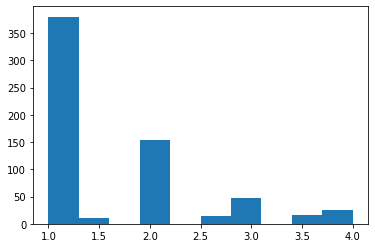

In [101]:
from matplotlib import pyplot as plt
plt.hist(normal_sim['Predicted'])
plt.show()

##### For scientific questions similarity

In [102]:
scin_sim=model_(train_scien_sem, test_scien_sem, tree.DecisionTreeRegressor())

Mean Absolute Error :  0.5695517774343122
Mean Square Error :  0.8937403400309119


In [103]:
scin_sim

,Actual,Predicted
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,3.0
4,2.0,3.0
...,...,...
642,1.0,4.0
643,2.0,4.0
644,1.0,1.0
645,1.0,1.0


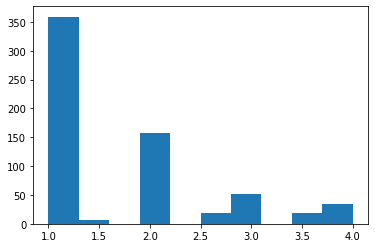

In [104]:
from matplotlib import pyplot as plt
plt.hist(scin_sim['Predicted'])
plt.show()

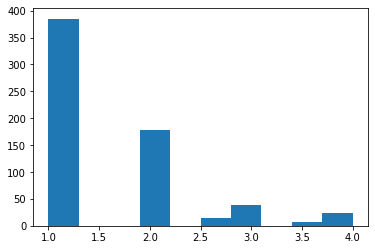

In [105]:
plt.hist(normal_sim['Actual'])
plt.show()

#### Evaluation for polynomial regression

##### For balanced data (normal ques)

In [106]:
norm_bal_sim=model_(train_oversam_sem, test_oversam_sem, make_pipeline(PolynomialFeatures(2),LinearRegression()))

Mean Absolute Error :  1.0162483536739342
Mean Square Error :  1.315332150306355


In [107]:
norm_bal_sim

,Actual,Predicted
0,1.0,1.825719
1,1.0,2.520169
2,1.0,2.362648
3,1.0,2.086367
4,2.0,2.217128
...,...,...
642,1.0,2.189738
643,2.0,2.689535
644,1.0,2.153367
645,1.0,2.859784


##### For balanced data(scientific ques)

In [108]:
scin_bal_sim=model_(train_sam_scien_sem, test_sam_scien_sem, make_pipeline(PolynomialFeatures(2),LinearRegression()))

Mean Absolute Error :  0.8419182765484519
Mean Square Error :  1.0040746650977777


In [109]:
scin_bal_sim

,Actual,Predicted
0,1.0,1.539687
1,1.0,1.484804
2,1.0,1.983969
3,1.0,3.050203
4,2.0,2.973025
...,...,...
642,1.0,2.727810
643,2.0,4.205449
644,1.0,1.540047
645,1.0,1.183677


##### For normal questions similarity

In [110]:
normal_sim=model_(train_sem, test_sem, make_pipeline(PolynomialFeatures(2),LinearRegression()))

Mean Absolute Error :  0.6125595352196436
Mean Square Error :  0.6128784700173027


In [111]:
normal_sim

,Actual,Predicted
0,1.0,1.158524
1,1.0,1.603043
2,1.0,1.523941
3,1.0,1.235275
4,2.0,1.523041
...,...,...
642,1.0,1.494064
643,2.0,2.384476
644,1.0,0.975693
645,1.0,1.811920


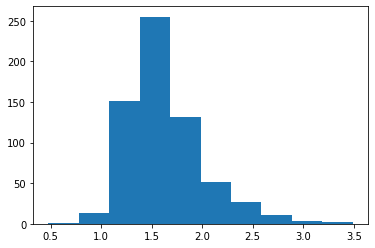

In [112]:
from matplotlib import pyplot as plt
plt.hist(normal_sim['Predicted'])
plt.show()

##### For scientific questions similarity

In [113]:
scin_sim=model_(train_scien_sem, test_scien_sem, make_pipeline(PolynomialFeatures(2),LinearRegression()))

Mean Absolute Error :  0.5270517916909213
Mean Square Error :  0.49803736202244436


In [114]:
scin_sim

,Actual,Predicted
0,1.0,0.968878
1,1.0,1.037755
2,1.0,1.373070
3,1.0,2.382917
4,2.0,2.163127
...,...,...
642,1.0,2.162326
643,2.0,3.703432
644,1.0,1.130467
645,1.0,1.144130


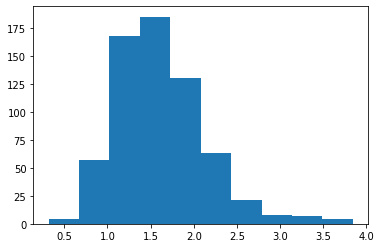

In [115]:
from matplotlib import pyplot as plt
plt.hist(scin_sim['Predicted'])
plt.show()

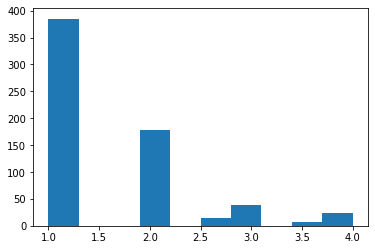

In [116]:
plt.hist(normal_sim['Actual'])
plt.show()

In [117]:
# for i in range(len(scin_sim['Predicted'])):
#     if scin_sim['Predicted'][i] >= 3.50001 : 
#        scin_sim['Predicted'][i]= 4
#     if scin_sim['Predicted'][i] <= 3.5 and scin_sim['Predicted'][i] >= 2.50001:
#        scin_sim['Predicted'][i]= 3
#     if scin_sim['Predicted'][i] < 3 and scin_sim['Predicted'][i] > 2.3:
#        scin_sim['Predicted'][i]= 2.5
#     if scin_sim['Predicted'][i] <= 2.3 and scin_sim['Predicted'][i] >= 1.600001:
#        scin_sim['Predicted'][i]= 2
#     if scin_sim['Predicted'][i] < 1.60001:
#        scin_sim['Predicted'][i]= 1

In [118]:
# print('Mean Absolute Error : ', metrics.mean_absolute_error(scin_sim['Actual'], scin_sim['Predicted']))

## Try Deep Learning Model for check text similarity

In [119]:
X_train=data_train.drop(columns=['scientific_Ques','Judge_score'])
y_train=data_train['Judge_score']
X_val=data_test.drop(columns=['scientific_Ques','Judge_score'])
y_val=data_test['Judge_score']

In [120]:
X_train

,Question_1,normal_Ques
0,information age change heart blood vessels als...,what age get shingle shoot children theur late...
1,what forget dose gabapentin,want know take gabamentine hydrocodene togethe...
2,what infant test procedure preparation also ca...,need know work place someone shingle especiall...
3,what ear discharge also call drainage ear otor...,sometimes drop peroxide ear let bubble couple ...
4,what cause cold intolerance also call sensitiv...,understand contagion transferrence cold germs ...
...,...,...
1502,what cause leg pain also call pain leg ache le...,father age always leg pain which use medicine
1503,what cause central sleep apnea also call sleep...,sleep apnea surgery hear never find doctor hus...
1504,what prescription drug abuse,bad uti months take cipro time uti return days...
1505,what cause ankle pain also call pain ankle,what cause rib cage pain remedy


In [121]:
X_train['text'] = X_train[['Question_1','normal_Ques']].apply(lambda x:str(x[0])+" "+str(x[1]), axis=1)

In [122]:
X_train['text'][0]

'information age change heart blood vessels also call heart disease age atherosclerosis age what age get shingle shoot children theur late early three bad case chicken pox children'

In [123]:
t = Tokenizer()
t.fit_on_texts(X_train['text'].values)

In [124]:
X_train['clean_q1'] = X_train['Question_1'].astype(str)
X_train['clean_q2'] = X_train['normal_Ques'].astype(str)
X_val['clean_q1'] = X_val['Question_1'].astype(str)
X_val['clean_q2'] = X_val['normal_Ques'].astype(str)

In [125]:
train_q1_seq = t.texts_to_sequences(X_train['clean_q1'].values)
train_q2_seq = t.texts_to_sequences(X_train['clean_q2'].values)
val_q1_seq = t.texts_to_sequences(X_val['clean_q1'].values)
val_q2_seq = t.texts_to_sequences(X_val['clean_q2'].values)

In [126]:
train_q1_seq[0]

[6, 61, 287, 74, 27, 1758, 2, 3, 74, 14, 61, 1759, 61]

In [127]:
len_vec = [len(sent_vec) for sent_vec in train_q1_seq]

In [128]:
np.max(len_vec)

67

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


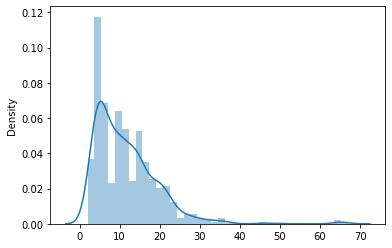

In [129]:
sns.distplot(len_vec)

In [130]:
len_vec = [len(sent_vec) for sent_vec in train_q2_seq]

In [131]:
np.max(len_vec)

81

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


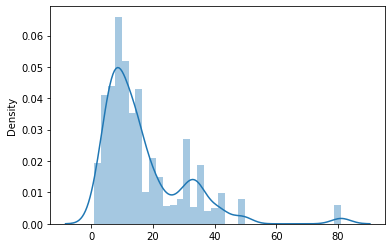

In [132]:
sns.distplot(len_vec)

In [133]:
max_len = 40

In [134]:
train_q1_seq = pad_sequences(train_q1_seq, maxlen=max_len, padding='post')
train_q2_seq = pad_sequences(train_q2_seq, maxlen=max_len, padding='post')
val_q1_seq = pad_sequences(val_q1_seq, maxlen=max_len, padding='post')
val_q2_seq = pad_sequences(val_q2_seq, maxlen=max_len, padding='post')

In [135]:
embeddings_index = {}
f = open('/content/drive/MyDrive/glove.6B.300d[1].txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400001 word vectors.


In [136]:
not_present_list = []
vocab_size = len(t.word_index) + 1
print('Loaded %s word vectors.' % len(embeddings_index))
embedding_matrix = np.zeros((vocab_size, len(embeddings_index['no'])))
for word, i in t.word_index.items():
    if word in embeddings_index.keys():
        embedding_vector = embeddings_index.get(word)
    else:
        not_present_list.append(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        embedding_matrix[i] = np.zeros(300)

Loaded 400001 word vectors.


In [137]:
def cosine_distance(vests):
    x, y = vests
    x = K.l2_normalize(x, axis=-1)
    y = K.l2_normalize(y, axis=-1)
    return -K.mean(x * y, axis=-1, keepdims=True)

def cos_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0],1)

In [138]:
input_1 = Input(shape=(train_q1_seq.shape[1],))
input_2 = Input(shape=(train_q2_seq.shape[1],))


common_embed = Embedding(name="synopsis_embedd",input_dim =len(t.word_index)+1, 
                       output_dim=len(embeddings_index['no']),weights=[embedding_matrix], 
                       input_length=train_q1_seq.shape[1],trainable=False) 
lstm_1 = common_embed(input_1)
lstm_2 = common_embed(input_2)


common_lstm = LSTM(64,return_sequences=True, activation="relu")
vector_1 = common_lstm(lstm_1)
vector_1 = Flatten()(vector_1)

vector_2 = common_lstm(lstm_2)
vector_2 = Flatten()(vector_2)

x3 = Subtract()([vector_1, vector_2])
x3 = Multiply()([x3, x3])

x1_ = Multiply()([vector_1, vector_1])
x2_ = Multiply()([vector_2, vector_2])
x4 = Subtract()([x1_, x2_])
    
    #https://stackoverflow.com/a/51003359/10650182
x5 = Lambda(cosine_distance, output_shape=cos_dist_output_shape)([vector_1, vector_2])
conc = Concatenate(axis=-1)([x5,x4, x3])

x = Dense(256, activation="relu", name='conc_layer')(conc)
x = Dropout(0.01)(x)
out = Dense(1, activation='linear',name = 'out')(x)

model = Model([input_1, input_2], out)

model.compile(loss="mean_squared_error",  optimizer=Adam(0.00001))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 synopsis_embedd (Embedding)    (None, 40, 300)      677700      ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 40, 64)       93440       ['synopsis_embedd[0][0]',    

In [139]:
model.fit([train_q1_seq,train_q2_seq],y_train.values.reshape(-1,1), epochs = 150,
          batch_size=64,validation_data=([val_q1_seq, val_q2_seq],y_val.values.reshape(-1,1)))

Epoch 1/150
24/24 [==============================] - 8s 175ms/step - loss: 3.1768 - val_loss: 2.8514
Epoch 2/150
24/24 [==============================] - 3s 144ms/step - loss: 2.9229 - val_loss: 2.5989
Epoch 3/150
24/24 [==============================] - 3s 141ms/step - loss: 2.6794 - val_loss: 2.3524
Epoch 4/150
24/24 [==============================] - 3s 139ms/step - loss: 2.4433 - val_loss: 2.1101
Epoch 5/150
24/24 [==============================] - 4s 163ms/step - loss: 2.2213 - val_loss: 1.8885
Epoch 6/150
24/24 [==============================] - 3s 145ms/step - loss: 2.0254 - val_loss: 1.7014
Epoch 7/150
24/24 [==============================] - 3s 139ms/step - loss: 1.8673 - val_loss: 1.5385
Epoch 8/150
24/24 [==============================] - 3s 139ms/step - loss: 1.7292 - val_loss: 1.4024
Epoch 9/150
24/24 [==============================] - 3s 144ms/step - loss: 1.6084 - val_loss: 1.2869
Epoch 10/150
24/24 [==============================] - 3s 145ms/step - loss: 1.5035 - val_lo

In [140]:
ynew = model.predict([val_q1_seq, val_q2_seq])

In [141]:
dff2=pd.DataFrame()
dff2['Actual']=y_val
dff2['Predicted']=ynew
dff2

,Actual,Predicted
0,1.0,1.035084
1,1.0,1.130089
2,1.0,1.098251
3,1.0,1.135204
4,2.0,1.020414
...,...,...
642,1.0,0.949275
643,2.0,0.845993
644,1.0,0.808706
645,1.0,1.721539


In [142]:
metrics.mean_absolute_error(y_val,ynew)

0.43885621201632746

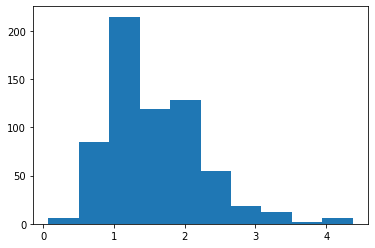

In [143]:
plt.hist(ynew)
plt.show()

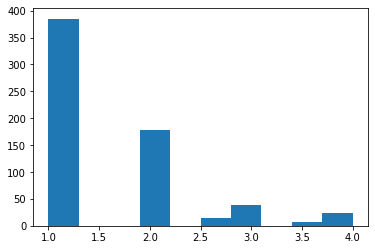

In [144]:
plt.hist(y_val)
plt.show()